Kalman Filters Lab:
-----

I ❤️ Pork Belly

<center><img src="http://jesspryles.com/wp-content/uploads/2016/06/pork-belly-40.jpg" height="500"/></center>


Today we are going to try to predict Pork Belly futures. Learn more - http://www.investopedia.com/university/commodities/commodities16.asp

Maybe even corner the market, then _All Your Pork Belly Belong to Us_.

Unfortunely, we do not have good history data so we'll start with random noise

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt

%matplotlib inline

In [1]:
sigma_h = 10.0
n_states = 100
h = np.random.normal(-5, sigma_h, n_states)
h[0] = 0.0
a = np.cumsum(h)

df = pd.DataFrame(a[0:100], columns=['value'])
df.plot(figsize=(14,6), style='b--');

NameError: name 'np' is not defined

__TODO__: How would you describe our pork bellys? Should we buy or sell?

__Solution__:

Up & to the right 📈

BUY, BUY, BUY

That is our underlying "true" value. However, only observe the market price which has noise

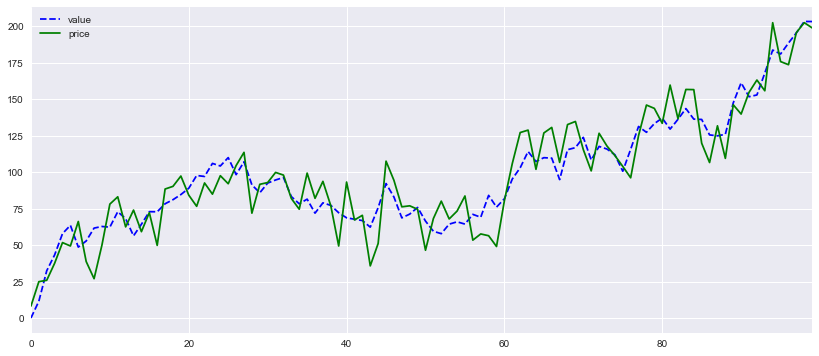

In [40]:
sigma_e = 15
e = np.random.normal(0, sigma_e, n_states)
df['price'] = a[0:100] + e[0:100]
df.plot(figsize=(14,6), style=['b--', 'g-',]);

Check for understanding
------

<br>
<details><summary>
What is the difference between price and value?
</summary>
Price is what you pay.  
Value is what you get.
</details>

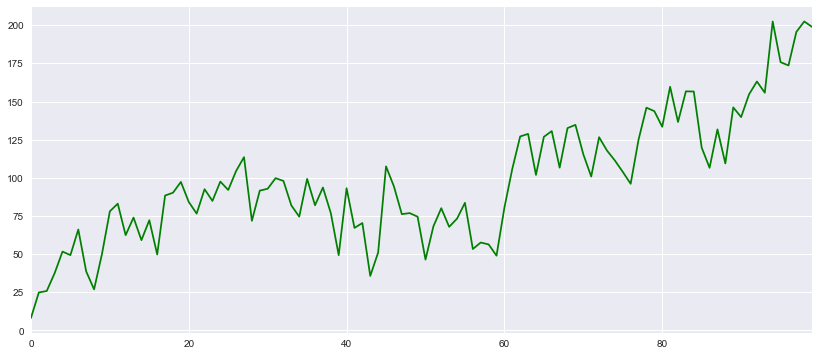

In [41]:
# Let's try to predict value by only observing price!
df.price.plot(figsize=(14,6), style=['g-',]);

KF modeling with statsmodel
------

In [42]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter # That is a mouthful

[RFTM](http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.kalman_filter.KalmanFilter.html)

In [43]:
KalmanFilter?

In [49]:
kf = KalmanFilter(k_endog=df.price.values,
                 k_states=n_states)

# kf.obs_cov = np.array([sigma_e]) # H
# kf.state_cov = np.array([sigma_h])  # Q
# kf.design = np.array([1.0])  # Z
# kf.transition = np.array([1.0])  # T
# kf.selection = np.array([1.0])  # R

# # ys, ah = kf.simulate(100)

In [47]:
ys, ah = kf.simulate(n_states)

In [ ]:
# Initialize known state
kf.initialize_known(np.array([0.0]), np.array([[sigma_h]]))

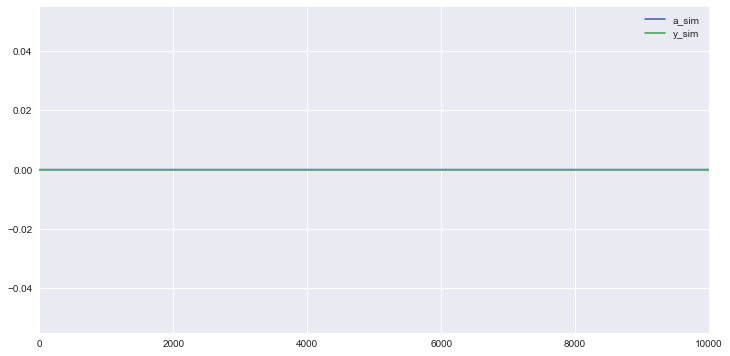

In [50]:
pd.DataFrame({'y_sim': ys.flatten(), 'a_sim': ah.flatten()}).plot(figsize=(12,6))

<br>
<br> 
<br>

----